# AlphaFold2 Plotter

### Note that DiUp13x64recycles_763c9_unrelaxed_rank_1_model_1 is the ColabFold structural model of DiCASP-σ and DiCsx30

Modified from ColabFold AlphaFold 2 code: https://github.com/sokrypton/ColabFold

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import json, csv
import seaborn as sns

## Plot PAE scores

In [2]:
# parse JSON file for PAEs
PAE_data = json.load(open('DiUp13x64recycles_763c9_predicted_aligned_error_v1.json'))
residue_distances = np.array(PAE_data[0]['distance']).reshape((785, 785))
residue_distances

array([[ 0.8,  2. ,  4.9, ..., 29.8, 29.4, 29.4],
       [ 1.4,  0.8,  2.2, ..., 29.1, 29. , 28.5],
       [ 4.5,  1.4,  0.8, ..., 27.4, 27.6, 27. ],
       ...,
       [13.6, 12.4, 10.7, ...,  0.8,  1.1,  2.3],
       [18. , 15.8, 14.7, ...,  0.9,  0.8,  1.5],
       [21.9, 21.7, 21.1, ...,  3.4,  1.2,  0.8]])

In [3]:
from string import ascii_uppercase,ascii_lowercase
y_ticks_list = ["Csx30, CASP-σ"]
alphabet_list = list(ascii_uppercase+ascii_lowercase)
alphabet_list[0] = "Csx30"
alphabet_list[1] = "CASP-σ"
print(alphabet_list)
def plot_ticks(Ls):
    Ln = sum(Ls)
    L_prev = 0
    for L_i in Ls[:-1]:
        L = L_prev + L_i
        L_prev += L_i
        plt.plot([0,Ln],[L,L],color="black",linewidth=2.5)
        plt.plot([L,L],[0,Ln],color="black",linewidth=2.5)
    ticks = np.cumsum([0]+Ls)
    ticks = (ticks[1:] + ticks[:-1])/2
    plt.yticks(ticks,alphabet_list[:len(ticks)])

['Csx30', 'CASP-σ', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [4]:
from string import ascii_uppercase,ascii_lowercase
y_ticks_labels = ["Csx30", "CASP-σ"]
def plot_ticks(Ls):
    Ln = sum(Ls)
    L_prev = 0
    for L_i in Ls[:-1]:
        L = L_prev + L_i
        L_prev += L_i
        plt.plot([0,Ln],[L,L],color="black",linewidth=2.5)
        plt.plot([L,L],[0,Ln],color="black",linewidth=2.5)
    ticks = np.cumsum([0]+Ls)
    ticks = (ticks[1:] + ticks[:-1])/2
    plt.yticks(ticks,y_ticks_labels)

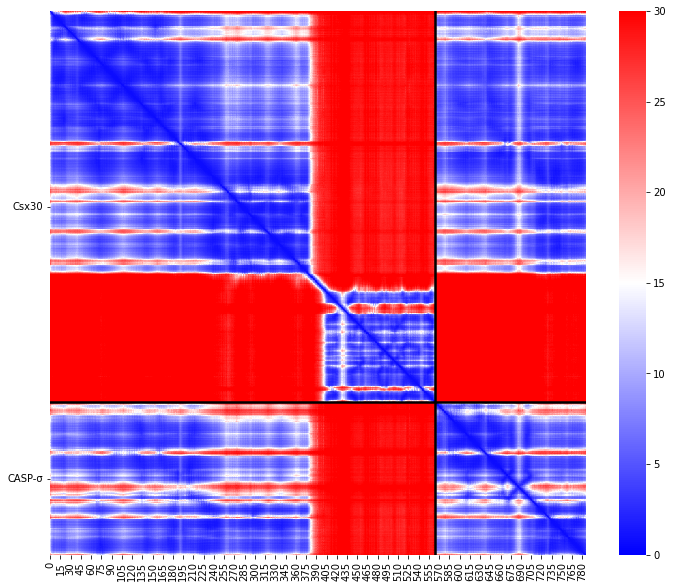

In [5]:
Ls = [565, 220]
plt.rcParams["figure.figsize"] = (12,10)
PAEs = sns.heatmap(residue_distances,cmap="bwr", vmin=0,vmax=30)
plot_ticks(Ls) 
fig = PAEs.get_figure()

fig.savefig("PAE.png", format='png' , dpi=1200)

plt.show()

## Plot pLDDT scores

In [6]:
# parse JSON file for pLDDT
Scores_data = json.load(open('DiUp13x64recycles_763c9_unrelaxed_rank_1_model_1_scores.json'))
plddt = Scores_data['plddt']
plddt

[29.12,
 39.62,
 52.48,
 69.85,
 77.42,
 90.32,
 88.11,
 85.89,
 87.65,
 91.88,
 91.51,
 90.48,
 92.92,
 94.45,
 91.78,
 92.29,
 92.89,
 93.47,
 92.12,
 92.66,
 93.04,
 91.47,
 85.67,
 84.07,
 80.55,
 82.71,
 84.16,
 82.04,
 83.39,
 83.56,
 85.81,
 81.92,
 83.53,
 85.48,
 82.16,
 80.12,
 79.26,
 78.09,
 74.28,
 72.6,
 68.17,
 67.73,
 81.54,
 83.87,
 90.49,
 91.36,
 91.12,
 94.06,
 95.59,
 95.01,
 95.5,
 97.3,
 96.36,
 96.67,
 97.4,
 97.38,
 96.56,
 96.79,
 97.61,
 96.78,
 96.46,
 97.33,
 95.96,
 95.59,
 95.6,
 94.58,
 95.34,
 94.93,
 94.24,
 94.29,
 95.96,
 97.1,
 95.54,
 95.93,
 94.9,
 92.69,
 90.98,
 92.03,
 92.47,
 94.97,
 95.86,
 94.82,
 97.08,
 97.36,
 96.2,
 96.78,
 97.52,
 97.42,
 96.55,
 97.45,
 96.89,
 96.54,
 97.1,
 95.89,
 94.61,
 95.63,
 96.08,
 94.4,
 92.78,
 93.88,
 94.22,
 91.87,
 89.94,
 91.2,
 91.93,
 91.47,
 87.77,
 85.97,
 90.27,
 94.1,
 94.73,
 93.68,
 94.84,
 95.12,
 96.03,
 96.25,
 94.89,
 93.83,
 95.2,
 94.61,
 90.0,
 91.62,
 93.08,
 90.58,
 87.61,
 91.29,
 93.07

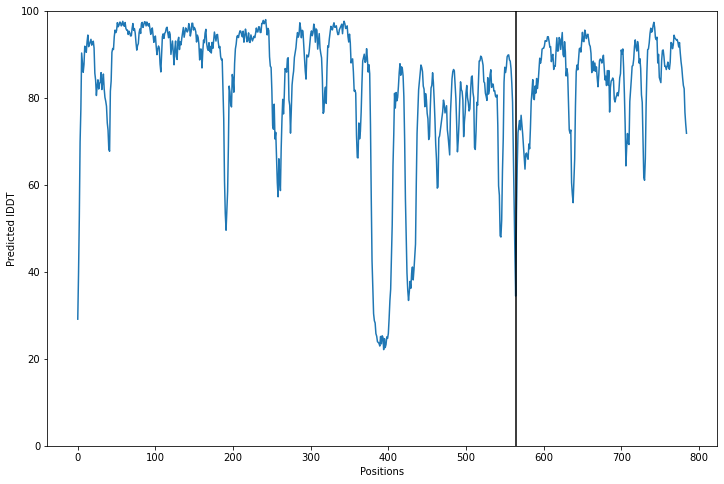

In [7]:
plt.figure(figsize = (12,8))
plt.plot(plddt)

Ls = [565, 220]
L_prev = 0
for L_i in Ls[:-1]:
  L = L_prev + L_i
  L_prev += L_i
  plt.plot([L,L],[0,100],color="black")
plt.ylim(0,100)
plt.ylabel("Predicted lDDT")
plt.xlabel("Positions")
plt.savefig("pLDDT.png", format='png' , dpi=1200)
plt.show()